<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> PROGRAMA DE VERÃO FGV EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# Regression
## This Lab Class requires the file <font color=blue> ESC2013_RMSP_CEM.csv </font> 

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

columns = ['TIP_DEP','BIBLIO','QD_ESP_C','QD_ESP_D',
           'AP5EF_07','AP9EF_07','AP5EF_08','AP9EF_08',
          'AP5EF_09','AP9EF_09','AP5EF_10','AP9EF_10',
          'AP5EF_11','AP9EF_11','AP5EF_12','AP9EF_12',
          'AP5EF_13','AP9EF_13',
          'MAT05_AF','LP05_AF','MAT07_AF','LP07_AF','MAT09_AF','LP09_AF',
          'MAT11_AF','LP11_AF','MAT13_AF','LP13_AF',
          'IDEB13AF']

###########
# reading data_frame
###########
df = pd.read_csv('ESC2013_RMSP_CEM.csv',usecols=columns)

###########
# extracting only municipal and estadual schools
###########
df = df.loc[(df['TIP_DEP']=='Municipal') | (df['TIP_DEP']=='Estadual')]
print(df.shape)

###########
# cleaning the data 
###########
# Removing schools with no score in IDEB13AF
df.dropna(subset=['IDEB13AF'],inplace=True)
print(df.shape)

# handling missing data
df[columns[4:]]=df[columns[4:]].fillna(df[columns[4:]].mean())
df[columns[1:]]=df[columns[1:]].fillna(0.0)


(5708, 29)
(2120, 29)


In [3]:
#############
# Setting the training data
#############
chosen_columns = columns[1:-1]

X_data = df[chosen_columns].values
Y_data = df[columns[-1]].values

#############
# Making the regression
#############

linear_regr = linear_model.LinearRegression()
ridge_regr = linear_model.Ridge(alpha=1.0)
lasso_regr = linear_model.Lasso(alpha=1.0)
linear_regr.fit(X_data, Y_data)
ridge_regr.fit(X_data, Y_data)
lasso_regr.fit(X_data, Y_data)

print("Betas Linear:",linear_regr.coef_,linear_regr.intercept_)
print("Betas Ridge:",ridge_regr.coef_,ridge_regr.intercept_)
print("Betas Lasso:",lasso_regr.coef_,lasso_regr.intercept_)

#############
# Computing the Error
#############

print("MSE Linear: %.5f" % np.mean(np.subtract(linear_regr.predict(X_data), Y_data) ** 2))
print("MSE Ridge: %.5f" % np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2))
print("MSE Lasso: %.5f" % np.mean(np.subtract(lasso_regr.predict(X_data).reshape(-1,1), Y_data) ** 2))

Betas Linear: [ 1.38292914e-03  8.91326242e-03  1.99975158e-03 -9.19617575e-04
  4.41869946e-04  6.04061347e-04 -3.69202248e-04 -7.99310342e-04
 -7.49316977e-04 -3.42448630e-04 -3.15824165e-05  1.28141385e-02
  1.23432734e-02  9.66278947e-04  7.90624064e-04  1.97070795e-03
  2.00930660e-02 -1.62599205e-03  2.27011917e-03 -1.40181117e-04
  1.09568284e-03 -4.46443912e-04  5.53789649e-04 -3.34299702e-04
  1.15972627e-04  1.50053708e-02  1.58072881e-02] -7.743405045437675
Betas Ridge: [ 1.37596235e-03  8.87866210e-03  1.98516069e-03 -9.19502104e-04
  4.41839612e-04  6.03772128e-04 -3.69168978e-04 -7.99426091e-04
 -7.49328904e-04 -3.42584135e-04 -3.15912357e-05  1.28128326e-02
  1.23433051e-02  9.66585295e-04  7.90655514e-04  1.97048956e-03
  2.00929332e-02 -1.62587478e-03  2.26992307e-03 -1.40068923e-04
  1.09572860e-03 -4.46378865e-04  5.53734811e-04 -3.34216709e-04
  1.15962756e-04  1.50053626e-02  1.58072176e-02] -7.743227424878131
Betas Lasso: [ 0.          0.          0.          0.  

### Regularization parameter is important 

(2120,)
Ridge min: (red) 0.01560873472965225
Lasso min: (green) 0.015683925918354505


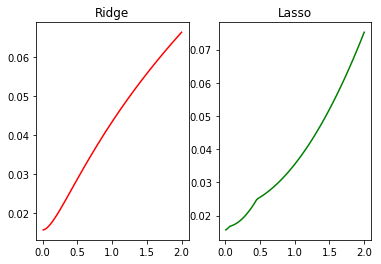

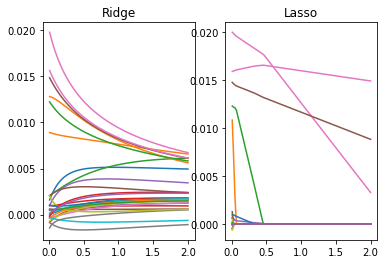

In [6]:
n_alphas = 100                       # number of regularization coefficients
a_ridge =  np.linspace(0.01,2,n_alphas)  # 50 values between 0.01 and 10
erl_ridge = []                      # list of errors for ridge regression
coefs_ridge = []                    # list of coefficients 
for i in a_ridge:
    ridge_regr = linear_model.Ridge(alpha=i,normalize=True)
    #ridge_regr = linear_model.Ridge(alpha=i)
    ridge_regr.fit(X_data, Y_data)
    erl_ridge.append(np.mean(np.subtract(ridge_regr.predict(X_data), Y_data) ** 2)) # MSE ridge
    coefs_ridge.append(ridge_regr.coef_)
    
a_lasso =  np.linspace(0.01,2,n_alphas)  # 50 values between 0.01 and 10
erl_lasso = []                      # list of errors for lasso regression
coefs_lasso = []
print(Y_data.shape)
for i in a_lasso:
    #lasso_regr = linear_model.Lasso(alpha=i,normalize=True)
    lasso_regr = linear_model.Lasso(alpha=i)
    lasso_regr.fit(X_data, Y_data)
    erl_lasso.append(np.mean(np.subtract(lasso_regr.predict(X_data).reshape(-1,1), Y_data.reshape(-1,1)) ** 2)) # MSE lasso
    coefs_lasso.append(lasso_regr.coef_)

plt.figure(1)
plt.subplot(121)
plt.title('Ridge')
plt.plot(a_ridge,erl_ridge,color='red')
plt.subplot(122)
plt.title('Lasso')
plt.plot(a_lasso,erl_lasso,color='green')

plt.figure(2)
plt.subplot(121)
plt.title('Ridge')
matridge_coefs = np.asarray(coefs_ridge).reshape(n_alphas,len(chosen_columns))
for i in range(matridge_coefs.shape[1]):
    plt.plot(a_ridge,matridge_coefs[:,i],label=chosen_columns[i])
#plt.legend()    

plt.subplot(122)
plt.title('Lasso')
matlasso_coefs = np.asarray(coefs_lasso).reshape(n_alphas,len(chosen_columns))
for i in range(matlasso_coefs.shape[1]):
    plt.plot(a_lasso,matlasso_coefs[:,i],label=chosen_columns[i])
#plt.legend(loc=2) 

print("Ridge min: (red)", min(erl_ridge))
print("Lasso min: (green)", min(erl_lasso))

### Using cross validation

In [4]:
from sklearn.model_selection import train_test_split

# --------------------
# K-fold CV
# --------------------
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.7, random_state=3)
ts = Y_test.shape[0]

linear_regr = linear_model.LinearRegression()
linear_regr.fit(X_train, Y_train)

# Predicting
Y_pred = linear_regr.predict(X_test)

# Prediction error
print("MSE Linear: %.5f" % np.mean(np.subtract(Y_pred, Y_test) ** 2))

MSE Linear: 0.01565


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
